# Example of analyzing a NN in isolation

## Load libraries and set random seed

In [1]:
import numpy as np
import nn_partition.analyzers as analyzers
from nn_partition.models.models import model_xiang_2020_robot_arm as robot_arm

In [2]:
np.random.seed(seed=0)

## Load NN controller

In [3]:
activation = "tanh" # "relu" "sigmoid"
torch_model, model_info = robot_arm(
    activation=activation
)
print(torch_model)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Tanh()
  (2): Linear(in_features=5, out_features=2, bias=True)
)


## Define NN input set

In [4]:
input_range = np.array(
    [  # (num_inputs, 2)
        [np.pi / 3, 2 * np.pi / 3],  # x0min, x0max
        [np.pi / 3, 2 * np.pi / 3],  # x1min, x1max
    ]
)

## Define partitioner hyperparameters

In [5]:
partitioner_hyperparams = {
    "num_simulations": 1e5,
    "type": "GreedySimGuided",
    "termination_condition_type": "time_budget",
    "termination_condition_value": 2, # seconds
    "interior_condition": "convex_hull",
    "make_animation": False,
    "show_animation": False,
    "show_input": True,
    "show_output": True,
}

## Define propagator hyperparameters

In [6]:
propagator_hyperparams = {
    "type": "CROWN_LIRPA",
    "input_shape": input_range.shape[:-1],
}

## Initialize analyzer, partitioner, propagator

In [7]:
analyzer = analyzers.Analyzer(torch_model)
analyzer.partitioner = partitioner_hyperparams
analyzer.propagator = propagator_hyperparams
print(analyzer)

## Compute the output set

In [8]:
output_range, analyzer_info = analyzer.get_output_range(input_range)
print(output_range)
# analyzer_info contains more details, including the convex hull of the partitioned output, if applicable

[[-11.96006203   1.08210754]
 [  2.84128571  14.83772564]]


## Generate a visualization of the input/output mapping

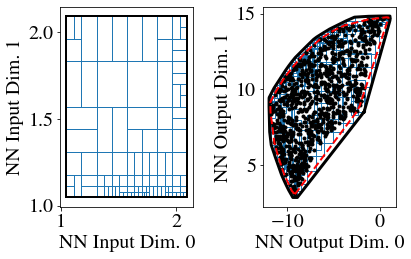

In [9]:
labels = {"input": [None, None], "output": [None, None]}
aspects = {"input": "auto", "output": "auto"}

analyzer.visualize(
    input_range,
    output_range,
    show=True,
    show_samples=True,
    show_legend=False,
    show_input=True,
    show_output=True,
    title=None,
    labels=labels,
    aspects=aspects,
    **analyzer_info
)

## Estimate the output set error

In [10]:
error = analyzer.get_error(input_range, output_range, **analyzer_info)
print("Error: {:.4f}".format(error))

Error: 0.0197
